## Structure
1. EDA
2. Supervised models (random forest, trees decisions, k-neighbors, regression)
3. Unsupervised models (clustering)

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Section 1

In [207]:
data = pd.read_csv('profiles.csv')
data.dropna(inplace=True)

# print(data.head())
print(data.info())
# print(data.columns)

warnings.filterwarnings('ignore')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4407 entries, 0 to 59944
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4407 non-null   int64  
 1   body_type    4407 non-null   object 
 2   diet         4407 non-null   object 
 3   drinks       4407 non-null   object 
 4   drugs        4407 non-null   object 
 5   education    4407 non-null   object 
 6   essay0       4407 non-null   object 
 7   essay1       4407 non-null   object 
 8   essay2       4407 non-null   object 
 9   essay3       4407 non-null   object 
 10  essay4       4407 non-null   object 
 11  essay5       4407 non-null   object 
 12  essay6       4407 non-null   object 
 13  essay7       4407 non-null   object 
 14  essay8       4407 non-null   object 
 15  essay9       4407 non-null   object 
 16  ethnicity    4407 non-null   object 
 17  height       4407 non-null   float64
 18  income       4407 non-null   int64  
 19  job  

In [200]:
mean_age = data['age'].mean()
print(mean_age)

33.65622872702519


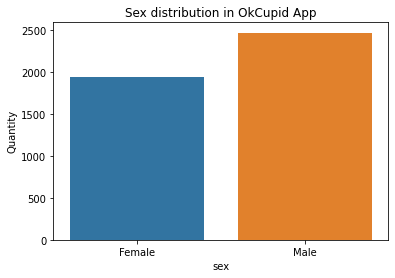

<Figure size 432x288 with 0 Axes>

In [201]:
sex_data = data.groupby("sex").sex.count()

sns.barplot(["Female", "Male"], [sex_data["f"], sex_data["m"]])
plt.title("Sex distribution in OkCupid App")
plt.xlabel("sex")
plt.ylabel("Quantity")
plt.show()
plt.clf()

body_type
average           1207
fit                906
athletic           799
curvy              448
thin               348
a little extra     322
skinny             125
full figured       102
overweight          60
jacked              40
used up             40
rather not say      10
Name: body_type, dtype: int64


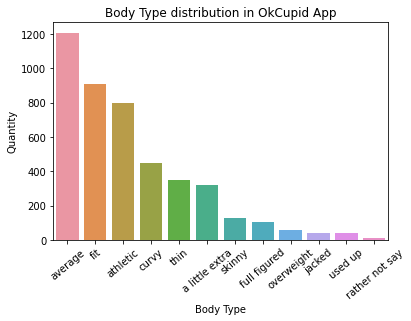

<Figure size 432x288 with 0 Axes>

In [202]:
# body_type, diet, drinks, drugs and education

body_type = data.groupby("body_type").body_type.count()
body_type.sort_values(ascending=False, inplace=True)
print(body_type)

# this works too
# sns.barplot(body_type.index.tolist(), body_type)
# plt.show()
# plt.clf()

sns.barplot(body_type.index.values, body_type.values)
plt.xticks(rotation=40)
plt.xlabel("Body Type")
plt.ylabel("Quantity")
plt.title("Body Type distribution in OkCupid App")
plt.show()
plt.clf()

diet
mostly anything        2257
strictly anything       636
anything                522
mostly vegetarian       441
mostly other            155
strictly vegetarian     125
strictly other           68
vegetarian               45
mostly vegan             41
other                    39
Name: diet, dtype: int64


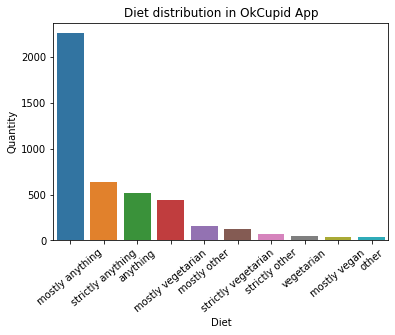

<Figure size 432x288 with 0 Axes>

In [203]:
diet = data.groupby("diet").diet.count()
diet.sort_values(ascending=False, inplace=True)
diet = diet.head(10)
print(diet)

sns.barplot(diet.index.values, diet.values)
plt.xticks(rotation=40)
plt.xlabel("Diet")
plt.ylabel("Quantity")
plt.title("Diet distribution in OkCupid App")
plt.show()
plt.clf()

drinks
socially       2958
rarely          581
often           396
not at all      386
very often       52
desperately      34
Name: drinks, dtype: int64


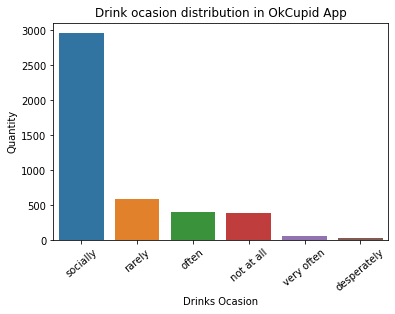

<Figure size 432x288 with 0 Axes>

In [204]:
drinks = data.groupby("drinks").drinks.count()
drinks.sort_values(ascending=False, inplace=True)
print(drinks)

sns.barplot(drinks.index.values, drinks.values)
plt.xticks(rotation=40)
plt.xlabel("Drinks Ocasion")
plt.ylabel("Quantity")
plt.title("Drink ocasion distribution in OkCupid App")
plt.show()
plt.clf()

drugs
never        3423
sometimes     916
often          68
Name: drugs, dtype: int64


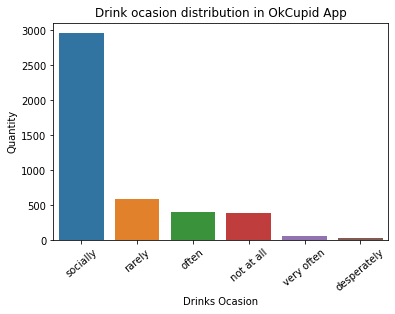

<Figure size 432x288 with 0 Axes>

In [205]:
drugs = data.groupby("drugs").drugs.count()
drugs.sort_values(ascending=False, inplace=True)
print(drugs)

sns.barplot(drinks.index.values, drinks.values)
plt.xticks(rotation=40)
plt.xlabel("Drinks Ocasion")
plt.ylabel("Quantity")
plt.title("Drink ocasion distribution in OkCupid App")
plt.show()
plt.clf()

education
graduated from college/university    1739
graduated from masters program        699
working on college/university         572
graduated from two-year college       184
graduated from high school            170
working on two-year college           132
working on masters program            128
dropped out of college/university     120
graduated from ph.d program           100
graduated from law school              91
Name: education, dtype: int64


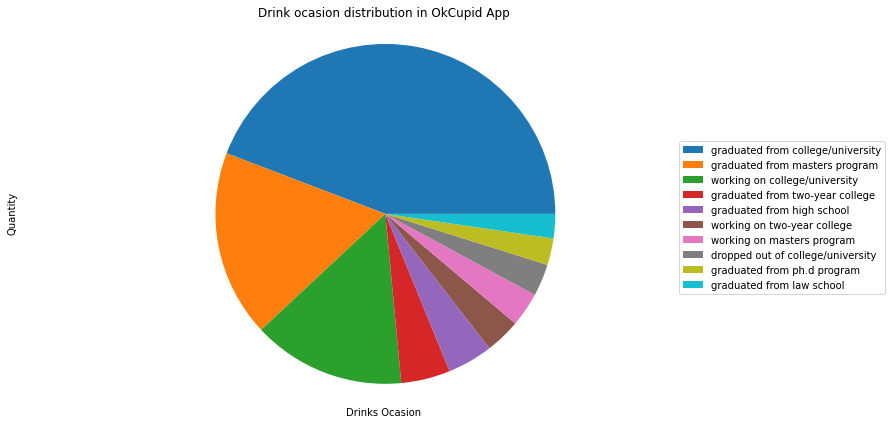

<Figure size 432x288 with 0 Axes>

In [206]:
education = data.groupby("education").education.count()
education.sort_values(ascending=False, inplace=True)
education = education.head(10)
print(education)

plt.figure(figsize=(13, 7))
plt.pie(education.values)
plt.legend(education.index.values, bbox_to_anchor=(.9, .7))
plt.xticks(rotation=40)
plt.xlabel("Drinks Ocasion")
plt.ylabel("Quantity")
plt.title("Drink ocasion distribution in OkCupid App")
plt.axis('equal')
plt.show()
plt.clf()

In [211]:
print(data.essay0[0])

# new_data = data[["age", "body_type", "drinks", "drugs", "education"]]
# print(new_data)

about me:<br />
<br />
i would love to think that i was some some kind of intellectual:
either the dumbest smart guy, or the smartest dumb guy. can't say i
can tell the difference. i love to talk about ideas and concepts. i
forge odd metaphors instead of reciting cliches. like the
simularities between a friend of mine's house and an underwater
salt mine. my favorite word is salt by the way (weird choice i
know). to me most things in life are better as metaphors. i seek to
make myself a little better everyday, in some productively lazy
way. got tired of tying my shoes. considered hiring a five year
old, but would probably have to tie both of our shoes... decided to
only wear leather shoes dress shoes.<br />
<br />
about you:<br />
<br />
you love to have really serious, really deep conversations about
really silly stuff. you have to be willing to snap me out of a
light hearted rant with a kiss. you don't have to be funny, but you
have to be able to make me laugh. you should be able to b